# Merten's Conjecture

From wikipedia:

> In mathematics, the Mertens conjecture is the statement that the Mertens function $M(n)$ is bounded by $\sqrt {n}$ Although now disproven, it has been shown to imply the Riemann hypothesis. It was conjectured by Thomas Joannes Stieltjes, in an 1885 letter to Charles Hermite (reprinted in Stieltjes (1905)), and again in print by Franz Mertens (1897), and disproved by Andrew Odlyzko and Herman te Riele (1985). It is a striking example of a mathematical conjecture proven false despite a large amount of computational evidence in its favor.

In number theory, we define the Mertens function as

$M(n)=\sum _{{1\leq k\leq n}}\mu (k)$

where μ(k) is the [Möbius function](https://en.wikipedia.org/wiki/M%C3%B6bius_function); the Mertens conjecture is that for all n > 1,

$|M(n)|<{\sqrt  {n}}$


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [13]:
import itertools
    
def sieve(s):
    """Sieve of Eratosthenes"""
    n = next(s)
    yield n
    yield from sieve(i for i in s if i%n!=0)

def prime_factors(n):
    """Returns the list of prime factors of n"""
    if n == 1:
        return []
    
    factors = []
    while n != 1:
        for p in sieve(itertools.count(start=2)):
            if n%p==0:
                factors.append(p)
                n/=p
                break
    return factors

def mu(n):
    """Returns -1, 0, or 1 depending on the number of prime
    factors of n. According to the following rule:
    
    - 1 if n has an even number of prime factors
    - -1 if n has an odd number of prime factors
    - 0 if n has any repeating factors
    """
    factors = prime_factors(n)
    l = len(factors)
    
    # If it has repeating factors
    if l != len(set(factors)):
        return 0

    if l%2 == 0:
        return 1 # Even number of factors
    else:
        return -1 # Odd number of factors
    
def M(n):
    """Returns the cumulative sum of applying
    mu from 1 to n
    """
    if n==1:
        return mu(n)
    else:
        return mu(n) + M(n-1)

In [14]:
n = 500


ns = np.arange(1, n+1)

rts = np.array([n**(1/2) for n in ns])


Ms = np.array([M(n) for n in ns])

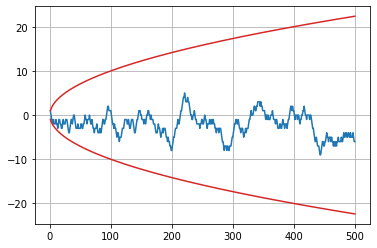

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ns, Ms)
ax.plot(ns, rts, color='tab:red')
ax.plot(ns, rts*-1, color='tab:red')
ax.grid(True)

plt.show()